In [73]:
import tensorflow as tf
x = tf.ones(shape=(2, 2))
print(x)
x = tf.zeros(shape=(2, 2))
print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


In [74]:
x = tf.random.normal(shape=(2, 2), mean=0., stddev=1.)
print(x)
x = tf.random.uniform(shape=(2, 2), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[-0.6809088 -3.0991294]
 [-1.5785118  0.1329739]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.7131928  0.7475598 ]
 [0.29413974 0.06854939]], shape=(2, 2), dtype=float32)


In [75]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [76]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.18786977],
       [-2.2316904 ],
       [ 0.734296  ]], dtype=float32)>


In [77]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [78]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [79]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [80]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [81]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [82]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [83]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [84]:
num_samples_per_class = 500
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [85]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [86]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

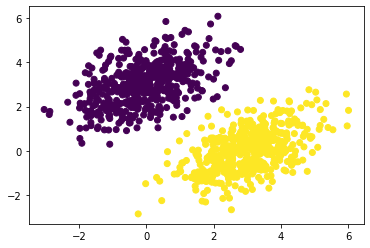

In [87]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [88]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [89]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [90]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [91]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [93]:
for step in range(20):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0322
Loss at step 1: 0.0315
Loss at step 2: 0.0308
Loss at step 3: 0.0302
Loss at step 4: 0.0296
Loss at step 5: 0.0291
Loss at step 6: 0.0286
Loss at step 7: 0.0282
Loss at step 8: 0.0278
Loss at step 9: 0.0275
Loss at step 10: 0.0271
Loss at step 11: 0.0268
Loss at step 12: 0.0266
Loss at step 13: 0.0263
Loss at step 14: 0.0261
Loss at step 15: 0.0259
Loss at step 16: 0.0257
Loss at step 17: 0.0255
Loss at step 18: 0.0253
Loss at step 19: 0.0252


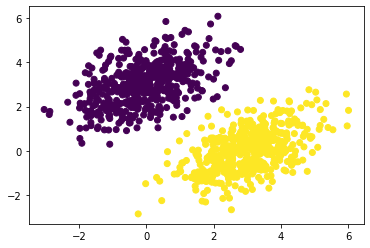

In [94]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

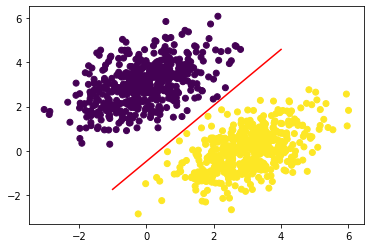

In [95]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [96]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [97]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [98]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [99]:
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [100]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [101]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [102]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [103]:
history = model.fit(
    inputs,
    targets,
    epochs=15,
    batch_size=128
)

Epoch 1/15
8/8 [==============================] - 1s 3ms/step - loss: 0.2413 - binary_accuracy: 0.9400
Epoch 2/15
8/8 [==============================] - 0s 3ms/step - loss: 0.2111 - binary_accuracy: 0.9550
Epoch 3/15
8/8 [==============================] - 0s 3ms/step - loss: 0.1911 - binary_accuracy: 0.9630
Epoch 4/15
8/8 [==============================] - 0s 5ms/step - loss: 0.1742 - binary_accuracy: 0.9660
Epoch 5/15
8/8 [==============================] - 0s 3ms/step - loss: 0.1592 - binary_accuracy: 0.9670
Epoch 6/15
8/8 [==============================] - 0s 3ms/step - loss: 0.1458 - binary_accuracy: 0.9690
Epoch 7/15
8/8 [==============================] - 0s 3ms/step - loss: 0.1335 - binary_accuracy: 0.9690
Epoch 8/15
8/8 [==============================] - 0s 4ms/step - loss: 0.1221 - binary_accuracy: 0.9690
Epoch 9/15
8/8 [==============================] - 0s 3ms/step - loss: 0.1117 - binary_accuracy: 0.9720
Epoch 10/15
8/8 [==============================] - 0s 4ms/step - loss: 0.

In [104]:
history.history

{'loss': [0.2413225620985031,
  0.2111494243144989,
  0.19107605516910553,
  0.1741807609796524,
  0.15924111008644104,
  0.14582468569278717,
  0.13349881768226624,
  0.12210345268249512,
  0.11169023811817169,
  0.10232309252023697,
  0.09392789751291275,
  0.08646951615810394,
  0.07986700534820557,
  0.07418201863765717,
  0.06933514773845673],
 'binary_accuracy': [0.9399999976158142,
  0.9549999833106995,
  0.9629999995231628,
  0.9660000205039978,
  0.9670000076293945,
  0.968999981880188,
  0.968999981880188,
  0.968999981880188,
  0.972000002861023,
  0.9739999771118164,
  0.9739999771118164,
  0.9739999771118164,
  0.9739999771118164,
  0.9769999980926514,
  0.9769999980926514]}

In [105]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=15,
    batch_size=8,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/15
88/88 [==============================] - 1s 8ms/step - loss: 0.1999 - binary_accuracy: 0.9186 - val_loss: 0.1578 - val_binary_accuracy: 0.7500
Epoch 2/15
88/88 [==============================] - 0s 3ms/step - loss: 0.0671 - binary_accuracy: 0.9686 - val_loss: 0.4221 - val_binary_accuracy: 0.5100
Epoch 3/15
88/88 [==============================] - 0s 3ms/step - loss: 0.0760 - binary_accuracy: 0.9500 - val_loss: 0.0688 - val_binary_accuracy: 0.9633
Epoch 4/15
88/88 [==============================] - 0s 3ms/step - loss: 0.0709 - binary_accuracy: 0.9586 - val_loss: 0.0590 - val_binary_accuracy: 0.9667
Epoch 5/15
88/88 [==============================] - 0s 3ms/step - loss: 0.0751 - binary_accuracy: 0.9643 - val_loss: 0.0909 - val_binary_accuracy: 0.9967
Epoch 6/15
88/88 [==============================] - 0s 3ms/step - loss: 0.0733 - binary_accuracy: 0.9629 - val_loss: 0.2262 - val_binary_accuracy: 0.8600
Epoch 7/15
88/88 [==============================] - 0s 2ms/step - loss: 0.07

In [106]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:20])

[[-0.6320169 ]
 [-0.41595334]
 [ 1.0054033 ]
 [ 1.05779   ]
 [-0.46044177]
 [ 0.7712646 ]
 [-0.59891057]
 [ 0.68725646]
 [ 0.6509675 ]
 [-0.73834836]
 [ 0.8448839 ]
 [ 0.62380356]
 [-0.56867415]
 [-0.31228298]
 [ 0.8435011 ]
 [ 0.84130836]
 [ 0.9556106 ]
 [ 1.1803465 ]
 [-0.11921179]
 [ 0.69928944]]
